#### FOR NUMERICAL FEATURES

In [1]:
import pandas as pd

In [9]:
df= pd.read_csv('Titanic.csv',usecols= ['Age','Fare','Survived'])

In [10]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [11]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [12]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

#### RANDOM SMAPLE IMPUTATION

In [14]:
median= df['Age'].median()
median

28.0

In [16]:
df['Age'].dropna().sample()


62    45.0
Name: Age, dtype: float64

In [31]:
def change(df,variable,median) :
    df[variable+ '_median']= df[variable].fillna(median)
    df[variable+ '_random']= df[variable]
    random_sample= df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index= df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+ '_random']= random_sample

In [32]:
change(df,'Age',median)

In [44]:
df.head()

,Survived,Age,Fare,Agemedian,Agerandom,Age_random,Age_median
0,0,22.0,7.2500,22.0,22.0,22.0,22.0
1,1,38.0,71.2833,38.0,38.0,38.0,38.0
2,1,26.0,7.9250,26.0,26.0,26.0,26.0
3,1,35.0,53.1000,35.0,35.0,35.0,35.0
4,0,35.0,8.0500,35.0,35.0,35.0,35.0


In [45]:
df.drop(['Agemedian','Agerandom'], axis= 'columns',inplace= True)

In [46]:
df.head()

,Survived,Age,Fare,Age_random,Age_median
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [50]:
import numpy as np
df['Age_NAN']= np.where(df['Age'].isnull(),1,0)

In [49]:
df= pd.read_csv('Titanic.csv',usecols= ['Age','Fare','Survived'])

In [52]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [58]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [59]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


333 END OF DISTRIBUTION IMPUTATION

In [60]:
df= pd.read_csv('Titanic.csv',usecols= ['Age','Fare','Survived'])

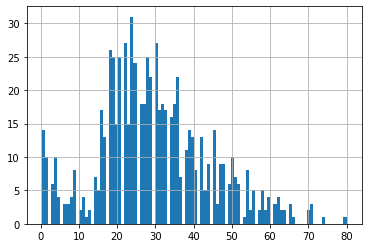

In [63]:
df['Age'].hist(bins=100)

In [64]:
import seaborn as sns

In [67]:
m= df['Age'].mean()

In [70]:
extreme= m + 3*df['Age'].std()

In [71]:
extreme

73.27860964406095

In [72]:
def impute(df,variable,median,extreme):
    df[variable+'_End_Distribution']= df[variable].fillna(extreme)
    df[variable]= df[variable].fillna(median)

In [74]:
impute(df,'Age',median,extreme)

In [79]:
df.isnull().sum()

Survived                0
Age                     0
Fare                    0
Age_End_Distribution    0
dtype: int64

In [80]:
df= pd.read_csv('Titanic.csv',usecols= ['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


#### FOR CATEGORICAL FEATURES

In [2]:
import pandas as pd

In [9]:
df= pd.read_csv("House prediction.csv",usecols= ['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [10]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### Repalcing the nan with the most frquent category

In [11]:
df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [13]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [37]:
def impute(df,variable):
    most_frequent= df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent,inplace=True)

In [39]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute(df,feature)




In [40]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

#### Making the nan value a new category

In [41]:
df= pd.read_csv("House prediction.csv",usecols= ['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [42]:
import numpy as np
def impute(df,variable):
    df[variable+'val']= np.where(df[variable].isnull(),'Missing',df[variable])
    

In [43]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute(df,feature)

In [44]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualval,FireplaceQuval,GarageTypeval
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [48]:
df= df.drop(['BsmtQual','FireplaceQu','GarageType','SalePrice'],axis= 1)

In [49]:
df.head()

,BsmtQualval,FireplaceQuval,GarageTypeval
0,Gd,Missing,Attchd
1,Gd,TA,Attchd
2,Gd,TA,Attchd
3,TA,Gd,Detchd
4,Gd,TA,Attchd
